<a href="https://colab.research.google.com/github/erkulev/erk/blob/main/API_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D0%BE%D1%86%D0%B5%D0%BD%D0%B8%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%B1%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B8_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Использование API статистического оценивания библиотеки Scikit-Learn включает следующие шаги (далее мы рассмотрим несколько подробных примеров).
1. Выбор класса модели с помощью импорта соответствующего класса оценивателя из библиотеки Scikit-Learn.
2. Выбор гиперпараметров модели путем создания экземпляра этого класса с соответствующими значениями.
3. Компоновка данных в матрицу признаков и целевой вектор в соответствии с описанным выше.
4. Обучение модели на своих данных посредством вызова метода fit() экземпляра модели.
5. Применение модели к новым данным

# Пример обучения с учителем: простая линейная регрессия

Возьмем следующие простые данные

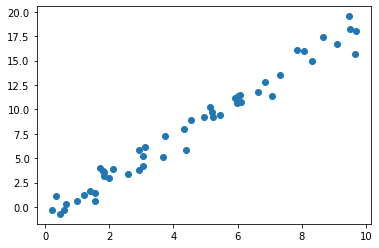

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

Затем мы можем воспользоваться описанным выше рецептом. Пройдемся по всем шагам этого процесса.
1. Выбор класса модели.
Каждый класс модели в библиотеке Scikit-Learn представлен соответствующим классом языка Python. Так, например, для расчета модели простой линейной регрессии можно импортировать класс линейной регрессии:

In [ ]:
from sklearn.linear_model import LinearRegression

2. Выбор гиперпараметров модели.
Подчеркнем важный момент: класс модели — не то же самое, что экземпляр модели.
После выбора класса модели у нас все еще остаются некоторые возможности для выбора. В зависимости от нашего класса модели может понадобиться ответить на один или несколько следующих вопросов.

       1.Хотим ли мы выполнить подбор сдвига прямой (то есть точки пересечения с осью координат)?

       2.Хотим ли мы нормализовать модель?

       3.Хотим ли мы сделать модель более гибкой, выполнив предварительную обработку признаков?

       4.Какая степень регуляризации должна быть у нашей модели?

       5.Сколько компонент модели мы хотели бы использовать?


Создадим экземпляр класса LinearRegression и укажем с помощью гиперпараметра fit_intercept, что нам бы хотелось выполнить подбор точки пересечения с осью координат:

In [ ]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

3. Формирование из данных матриц признаков и целевого вектора.
Ранее мы подробно рассмотрели представление данных в библиотеке Scikit-Learn, для которого необходимы двумерная матрица признаков и одномерный целевой вектор. Наша целевая переменная y уже имеет нужный вид (массив длиной n_samples), но нам придется проделать небольшие манипуляции с данными x, чтобы сделать из них матрицу размера [n_samples, n_features]. В данном случае манипуляции сводятся просто к изменению формы одномерного массива

In [ ]:
X = x[:, np.newaxis]
X.shape

(50, 1)

4. Обучение модели на наших данных.
Пришло время применить модель к данным. Сделать это можно с помощью метода fit() модели:

In [ ]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

5. Предсказание меток для новых данных.
После обучения модели главная задача машинного обучения с учителем заключается в вычислении с ее помощью значений для новых данных, не являющихся частью обучающей последовательности. Сделать это в библиотеке Scikit-Learn можно посредством метода predict(). В этом примере наши новые данные будут сеткой x-значений и нас будет интересовать, какие y-значения предсказывает модель:

In [ ]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Наконец, визуализируем результаты, нарисовав сначала график исходных данных, а затем обученную модель


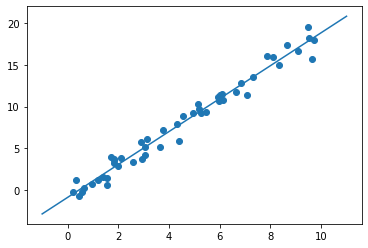

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

# Пример обучения с учителем: классификация набора данных Iris

Для этой задачи мы воспользуемся чрезвычайно простой обобщенной моделью, известной под названием «Гауссов наивный байесовский классификатор», исходящей из допущения, что все классы взяты из выровненного по осям координат Гауссова распределения. Гауссов наивный байесовский классификатор в силу отсутствия гиперпараметров и высокой производительности — хороший кандидат на роль эталонной классификации.

Мы собираемся проверить работу модели на неизвестных ей данных, так что необходимо разделить данные на обучающую последовательность (training set) и контрольную последовательность (testing set). Это можно сделать вручную, но удобнее воспользоваться вспомогательной функцией train_test_split:

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. Выбираем класс модели
model = GaussianNB() # 2. Создаем экземпляр модели
model.fit(Xtrain, ytrain) # 3. Обучаем модель на данных
y_model = model.predict(Xtest) # 4. Предсказываем значения
                              # для новых данных

Воспользуемся утилитой accuracy_score для выяснения того, какая часть предсказанных меток соответствует истинному значению:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

# Пример обучения без учителя: понижение размерности набора данных Iris
В качестве примера задачи обучения без учителя рассмотрим задачу понижения размерности набора данных Iris с целью упрощения его визуализации. Напомню, что данные Iris четырехмерны: для каждой выборки зафиксированы четыре признака.
Задача понижения размерности заключается в выяснении, существует ли подходящее представление более низкой размерности, сохраняющее существенные признаки данных. Зачастую понижение размерности используется для облегчения визуализации данных, в конце концов, гораздо проще строить график данных в двух измерениях, чем в четырех или более!
В этом разделе мы будем использовать метод главных компонент PCA, представляющий собой быстрый линейный метод понижения размерности. Наша модель должна будет возвращать две компоненты, то есть двумерное представление данных.

In [ ]:
from sklearn.decomposition import PCA # 1. Выбираем класс модели
model = PCA(n_components=2) # 2. Создаем экземпляр модели
                            # с гиперпараметрами
model.fit(X_iris) # 3. Обучаем модель на данных. Обратите
                  # внимание, что y мы не указываем!
X_2D = model.transform(X_iris) # 4. Преобразуем данные в двумерные

Построим график полученных результатов. Сделать это быстрее всего можно, вставив результаты в исходный объект DataFrame Iris и воспользовавшись функцией lmplot для отображения результатов:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


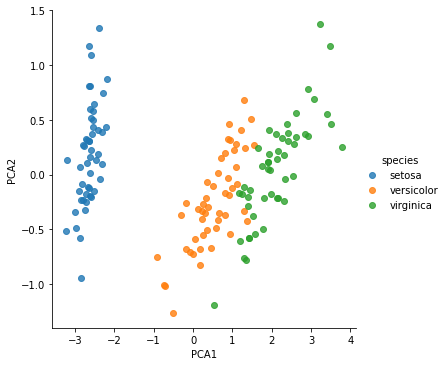

In [ ]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

Мы видим, что в двумерном представлении виды цветов четко разделены, хотя алгоритм PCA ничего не знает о метках видов цветов! Это показывает, что, как мы и видели ранее, даже относительно простая классификация на этом наборе данных, вероятно, будет работать достаточно хорошо

# Обучение без учителя: кластеризация набора данных Iris
Теперь рассмотрим кластеризацию набора данных Iris. Алгоритм кластеризации пытается выделить группы данных безотносительно к каким-либо меткам. Здесь мы собираемся использовать мощный алгоритм кластеризации под названием смесь Гауссовых распределений (Gaussian mixture model)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


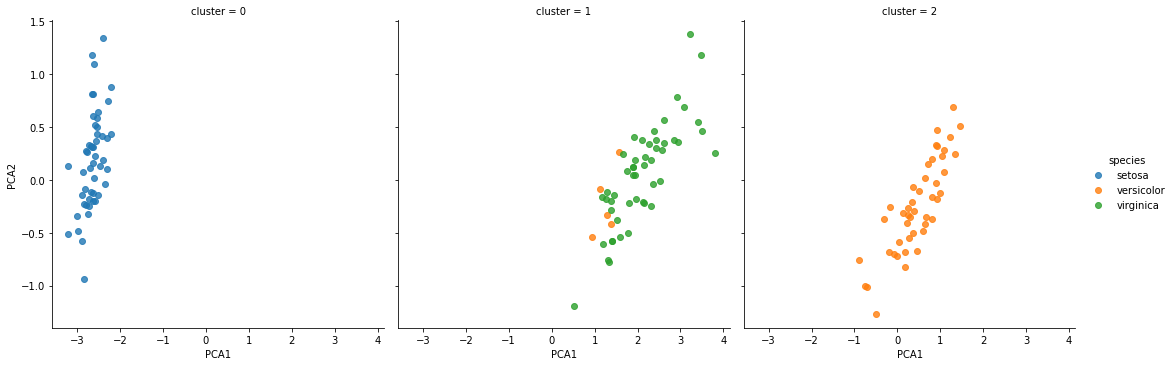

In [ ]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

Разбив данные в соответствии с номерами кластеров, мы видим, насколько хорошо алгоритм восстановил требуемые метки: вид setosa идеально выделен в кластер 0, правда, небольшое количество экземпляров видов versicolor и virginica смешались между собой. Следовательно, даже если у нас нет эксперта, который мог бы сообщить нам, к каким видам относятся отдельные цветки, одних измерений вполне достаточно для автоматического распознания этих различных разновидностей цветков с помощью простого алгоритма кластеризации! Подобный алгоритм может в дальнейшем помочь специалистам по предметной области выяснить связи между исследуемыми образцами.

# Прикладная задача: анализ рукописных цифр

Загрузка цифр

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

Данные изображений представляют собой трехмерный массив: 1797 выборок, каждая состоит из сетки пикселов размером 8 × 8. Визуализируем первую их сотню

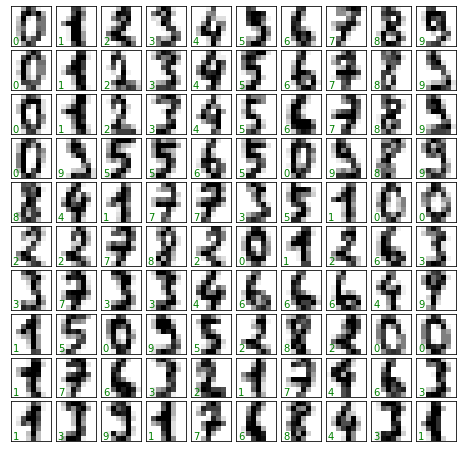

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary',
        interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
        transform=ax.transAxes, color='green')

Для работы с этими данными в библиотеке Scikit-Learn нам нужно получить их двумерное [n_samples, n_features] представление. Для этого мы будем трактовать каждый пиксел в изображении как признак, то есть «расплющим» массивы пикселовтак, чтобы каждую цифру представлял массив пикселов длиной 64 элемента. Кроме этого, нам понадобится целевой массив, задающий для каждой цифры предопределенную метку. Эти два параметра встроены в набор данных цифр в виде атрибутов data и target, соответственно:

In [ ]:
X = digits.data
X.shape


(1797, 64)

In [ ]:
y = digits.target
y.shape

(1797,)

Итого получаем 1797 выборок и 64 признака.

# Обучение без учителя: понижение размерности
Хотелось бы визуализировать наши точки в 64-мерном параметрическом пространстве, но эффективно визуализировать точки в пространстве такой высокой размерности непросто. Понизим вместо этого количество измерений до 2, воспользовавшись методом обучения без учителя. Здесь мы будем применять алгоритм обучения на базе многообразий под названием Isomap  и преобразуем данные в двумерный вид:

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

Теперь наши данные стали двумерными. Построим график этих данных, чтобы увидеть, можно ли что-то понять из их структуры

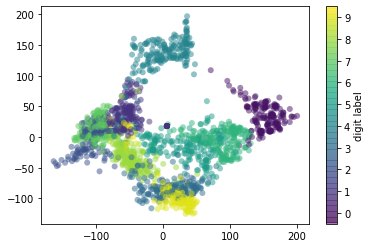

In [ ]:
plt.scatter(data_projected[:, 0], data_projected[:, 1],
c=digits.target, edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap())
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Этот график дает нам представление о разделении различных цифр в 64-мерном пространстве. Например, нули (отображаемые черным цветом) и единицы(отображаемые фиолетовым) практически не пересекаются в параметрическом пространстве. На интуитивном уровне это представляется вполне логичным: нули содержат пустое место в середине изображения, а у единиц там, наоборот, чернила. С другой стороны, единицы и четверки на графике располагаются сплошным спектром, что понятно, ведь некоторые люди рисуют единицы со «шляпками», из-за чего они становятся похожи на четверки.

# Классификация цифр
Применим алгоритм классификации к нашим цифрам. Как и в случае с набором данных Iris, разобьем данные на обучающую и контрольную последовательности, после чего обучим на первой из них Гауссову наивную байесовскую модель таким образом:

In [ ]:
Xtrain, Xtest, ytrain, ytest =train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Теперь, осуществив предсказания по нашей модели, мы можем оценить ее точность, сравнив настоящие значения из контрольной последовательности с предсказанными:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Даже при такой исключительно простой модели мы получили более чем 80%-ную точность классификации цифр! Однако из одного числа сложно понять, где наша модель ошиблась. Для этой цели удобна так называемая матрица различий (confusion matrix), вычислить которую можно с помощью библиотеки Scikit-Learn, а нарисовать посредством Seaborn

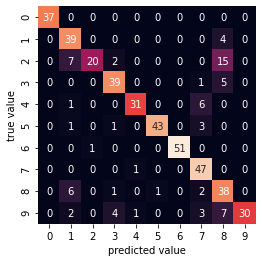

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value') # Прогнозируемое значение
plt.ylabel('true value'); # Настоящее значение

Этот рисунок демонстрирует нам места, в которых наш классификатор склонен ошибаться, например, значительное количество двоек ошибочно классифицированы как единицы или восьмерки. Другой способ получения информации о характеристиках модели — построить график входных данных еще раз вместе с предсказанными метками. Мы будем использовать зеленый цвет для правильных меток, и красный — для ошибочных

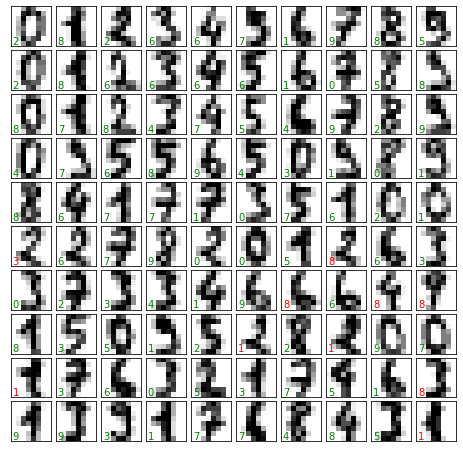

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
          subplot_kw={'xticks':[], 'yticks':[]},
           gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary',
          interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform=ax.transAxes,
          color='green' if (ytest[i] == y_model[i]) else 'red')

Из этого подмножества данных можно почерпнуть полезную информацию относительно мест, в которых алгоритм работает неоптимально. Чтобы поднять нашу точность выше 80 %, можно воспользоваться более сложным алгоритмом, таким как метод опорных векторов , случайные леса , деревья принятия решенийили другим методом классификации.